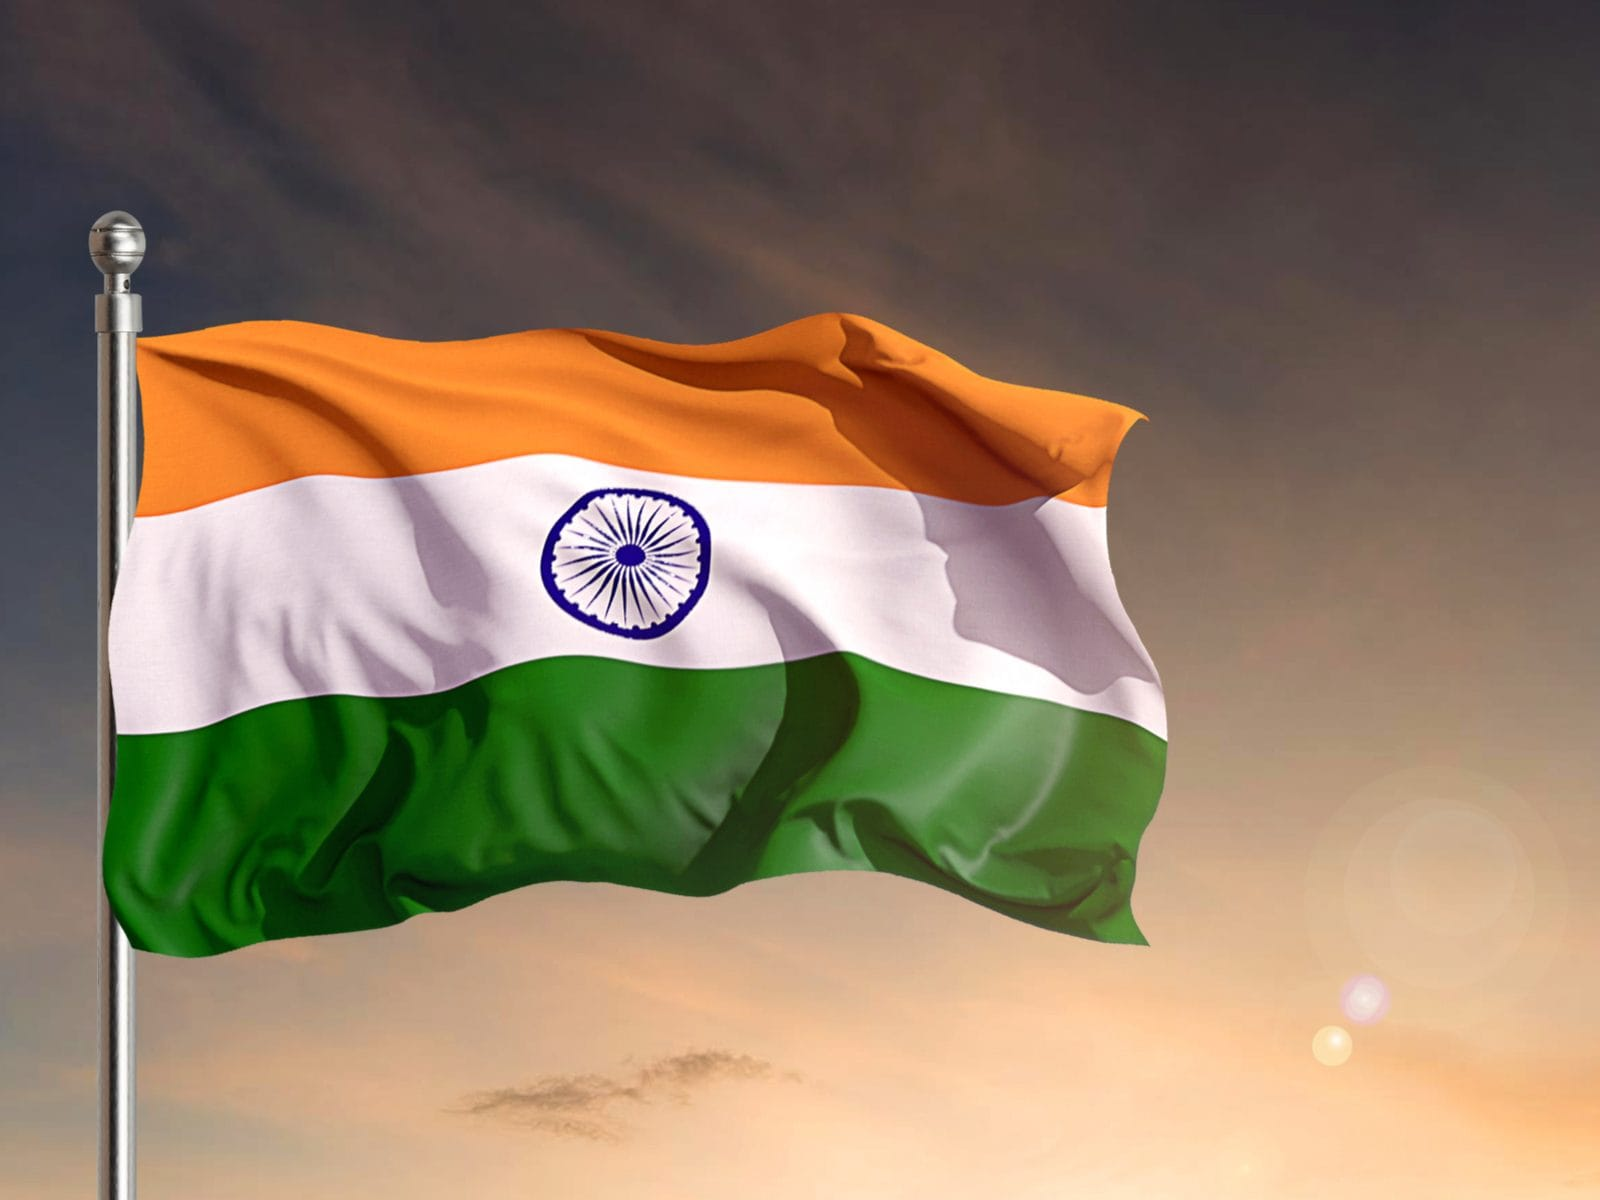

# GDP and Population Growth in India

I've noticed many people reading my notebook here and on LinkedIn are from India.
So today I've decided to do a notebook about their country

**1. Data Preparation**

**2. Data Visualization**

# 1. Data Preparation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

/kaggle/input/indian-gdp/India_GDP_Data.csv
/kaggle/input/indian-gdp/India_GDP_Historical_Data.csv


In [2]:
df = pd.read_csv('/kaggle/input/indian-gdp/India_GDP_Data.csv')
df.head()

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
0,2021,3173.40,2277,8.95
1,2020,2667.69,1933,-6.60
2,2019,2831.55,2072,3.74
3,2018,2702.93,1998,6.45
4,2017,2651.47,1981,6.80


In [3]:
df.sort_values('Year', ascending=True, inplace=True)
df.head()

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
60,1961,39.23,85,3.72
59,1962,42.16,90,2.93
58,1963,48.42,101,5.99
57,1964,56.48,116,7.45
56,1965,59.55,119,-2.64


In [4]:
df.columns = ['Year', 'GDP_Billion_USD', 'Per_Capita_USD',
       'Percentage_Growth']

In [5]:
df['Pop_M'] = 1000 * df['GDP_Billion_USD'] / df['Per_Capita_USD']
df['Pop_Growth'] = df['Pop_M'].pct_change()
df['Pop_Growth'] *= 100
df['Per_Capita_Growth'] = df['Per_Capita_USD'].pct_change()
df['Per_Capita_Growth'] *= 100

We now have 6 columns to graph, twice as much as before

# 2. Data Visualization

**GDP, per capita GDP, and Population line plots**

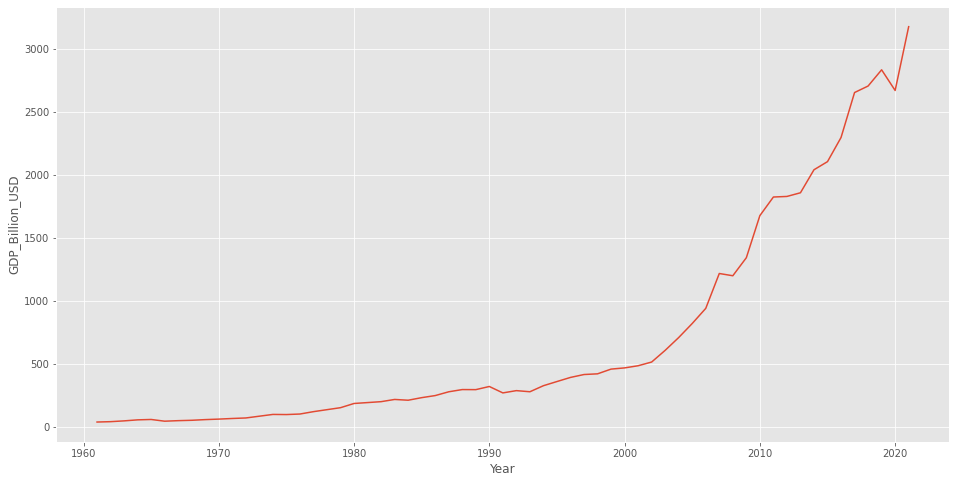

In [6]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df, x='Year', y='GDP_Billion_USD')
plt.show()

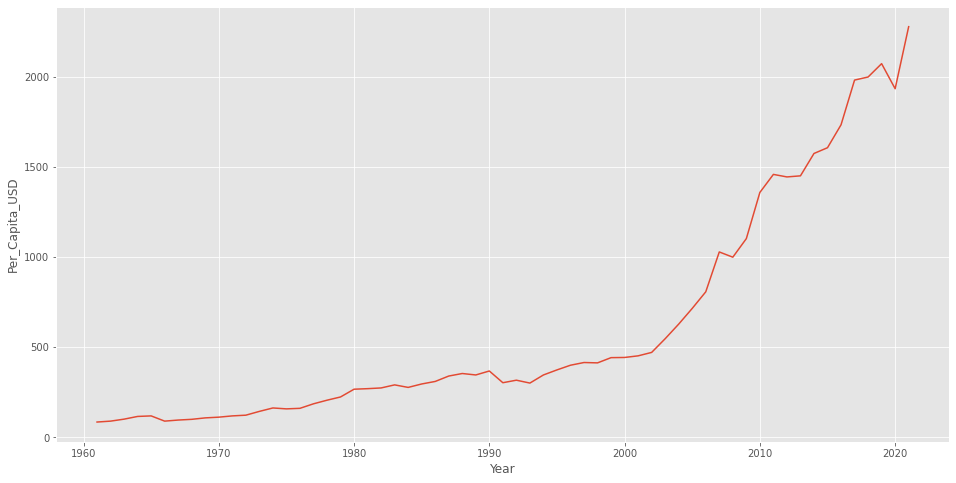

In [7]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df, x='Year', y='Per_Capita_USD')
plt.show()

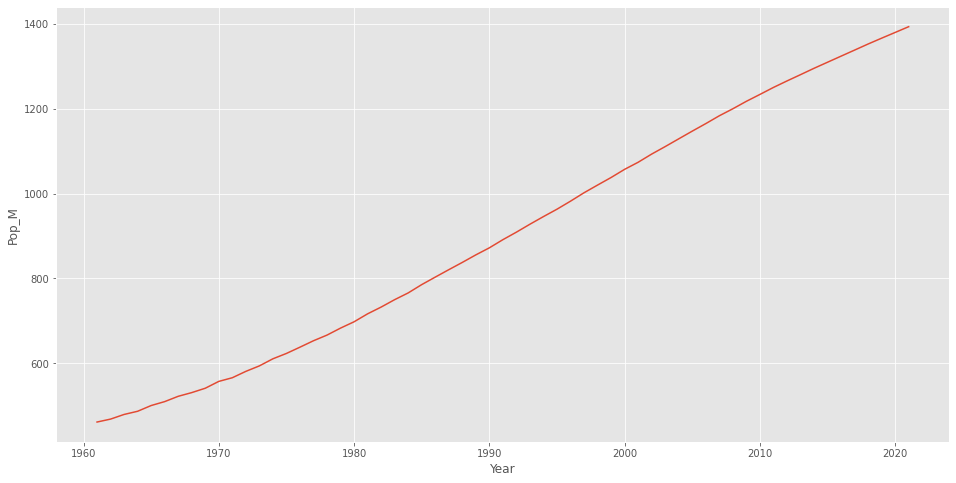

In [8]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df, x='Year', y='Pop_M')
plt.show()

In [9]:
indian_color = ['#FF9933', '#FFFFFF', '#FFFFFF', '#138808','#138808', '#FFFFFF', '#FF9933']
indian_palette = sns.color_palette(indian_color)

**GDP, per capita, and population growth bar plots**

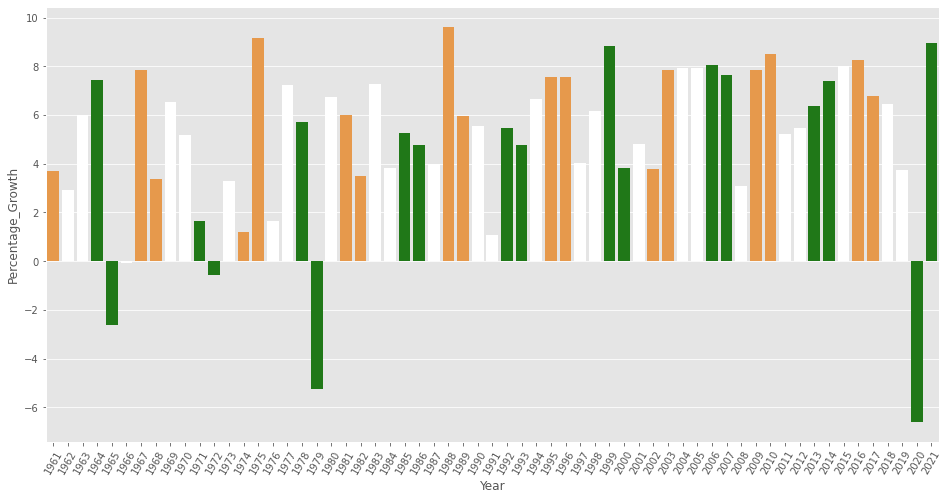

In [10]:
plt.figure(figsize=(16,8))
sns.barplot(data=df, x='Year', y='Percentage_Growth', palette=indian_palette)
plt.xticks(rotation=60)
plt.show()

during the 60 years of the data, India only had a few short recession in:
* 1965-66
* 1971
* 1979
* 2020

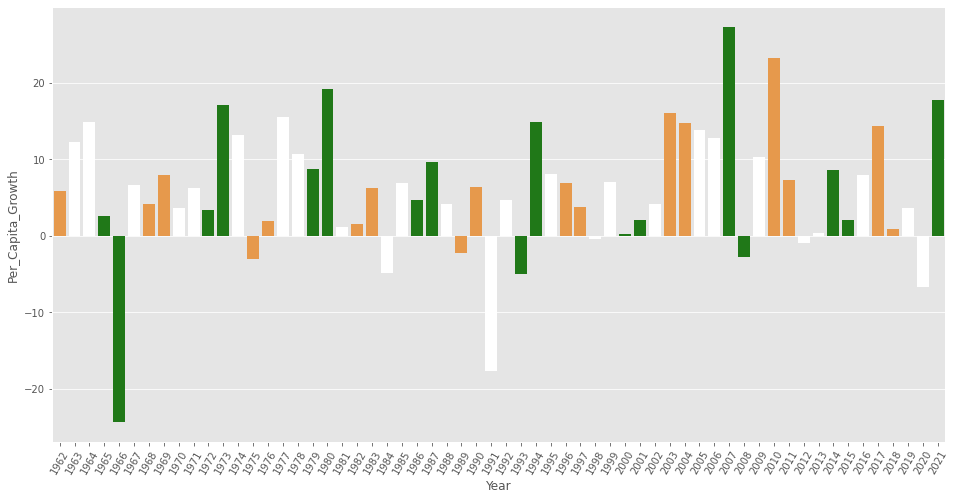

In [11]:
plt.figure(figsize=(16,8))
sns.barplot(data=df.iloc[1:], x='Year', y='Per_Capita_Growth', palette=indian_palette)
plt.xticks(rotation=60)
plt.show()

The GDP per capita has increase most of the time, and is still quickly increasing

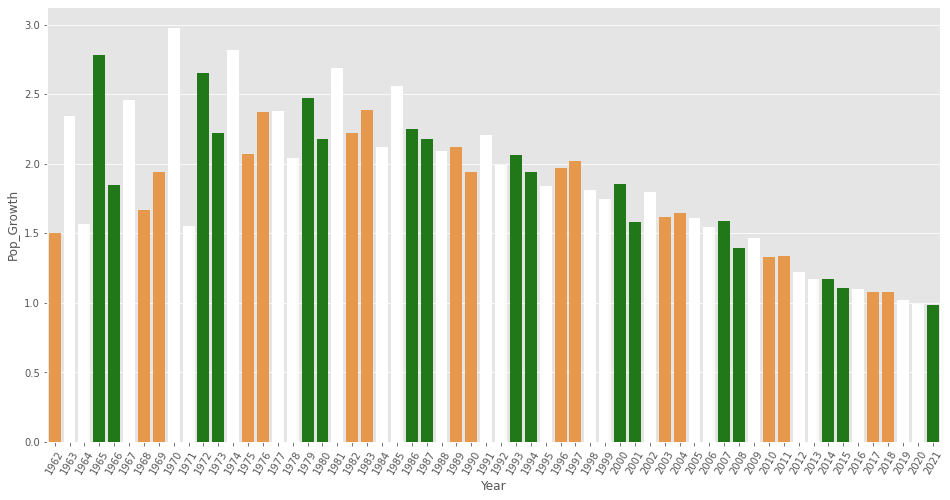

In [12]:
plt.figure(figsize=(16,8))
sns.barplot(data=df.iloc[1:], x='Year', y='Pop_Growth', palette=indian_palette)
plt.xticks(rotation=60)
plt.show()

The population has grown steadily since the 60s but the growth is reducing progressively

# Summary

In this notebook, I visually explore the demographic and economic data of India.

The per capita GDP and per capita GDP growth seems a bit inaccurate, maybe because the number was round.

I also learned how to create a customized palette in seaborn and apply it to the graph